<a href="https://colab.research.google.com/github/nedosh/StochasticProcesses/blob/main/Donskers_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

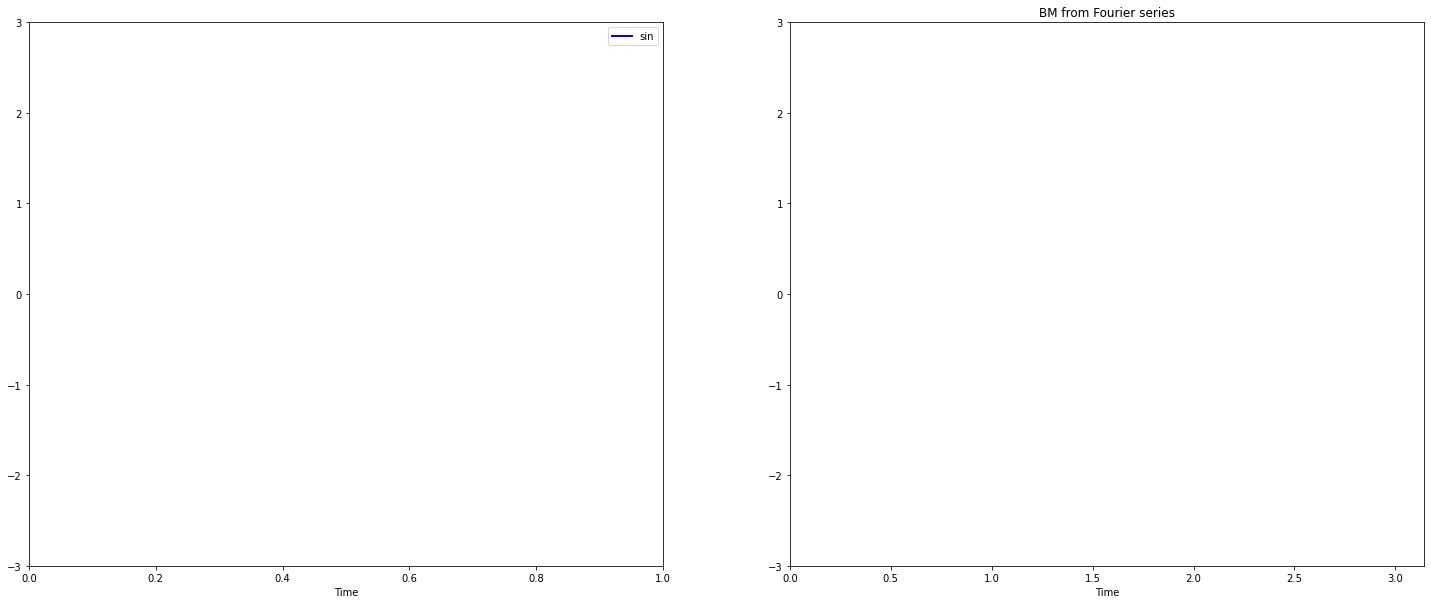

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create a figure and axes
fig = plt.figure(figsize=(25,10))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 1))            
ax1.set_ylim((-3, 3))
ax1.set_xlabel('Time')
ax2.set_title("Donker's theorem")

ax2.set_xlim((0, np.pi))
ax2.set_ylim((-3, 3))
ax2.set_xlabel('Time')
ax2.set_title('BM from Fourier series')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax2.plot([], [], 'r', lw=2)
#pt1, = ax2.plot([], [], 'g.', ms=20)
#line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);


In [23]:
ax1.plot([], [], 'b', lw=2)

In [2]:
from scipy.stats import norm, expon

N = 10000
NUM_TRAJECTORIES = 10
# animation function. This is called sequentially
sample_donsker = np.array([])
distr = expon
args=[3]

def donsker(n):
    global sample_donsker
    sample_new = (distr.rvs(*args, size=1) - distr.mean(*args) )/distr.std(*args)
    sample_donsker = np.concatenate([sample_donsker, sample_new], axis=0)
    y = np.cumsum(sample_donsker)/np.sqrt(sample_donsker.shape[0]) 
    x = np.linspace(0, 1, y.shape[0])
    return x, y


y_global = np.linspace(0, np.pi, N) * norm.rvs(size=1) / np.sqrt(np.pi)

def BM_fourier(n):
    global y_global

    x = np.linspace(0, np.pi, N)  
    sample_new = norm.rvs(size=1)
    y_global += np.sqrt(2./np.pi) * np.sin(n*x) * sample_new / n
    return (x, y_global)



def drawframe(n):
    n = n+1
    x = np.linspace(0, 1, N)
    x_t, y_t = donsker(n)
    # print(n, x_t.shape, y_t.shape, x.shape)
    line1.set_data(donsker(n))
    line2.set_data(BM_fourier(n))
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [4]:
from matplotlib import animation
from matplotlib import rc
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=2, blit=False)

# equivalent to rcParams['animation.html'] = 'jshtml'
rc('animation', html='jshtml')
anim